<a href="https://colab.research.google.com/github/josooik/DeepLearning/blob/main/10_build_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 구현

In [102]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import layers, models
from tensorflow.keras import utils

## 1. VGG 16

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/10_vgg.png?raw=true)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_82 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

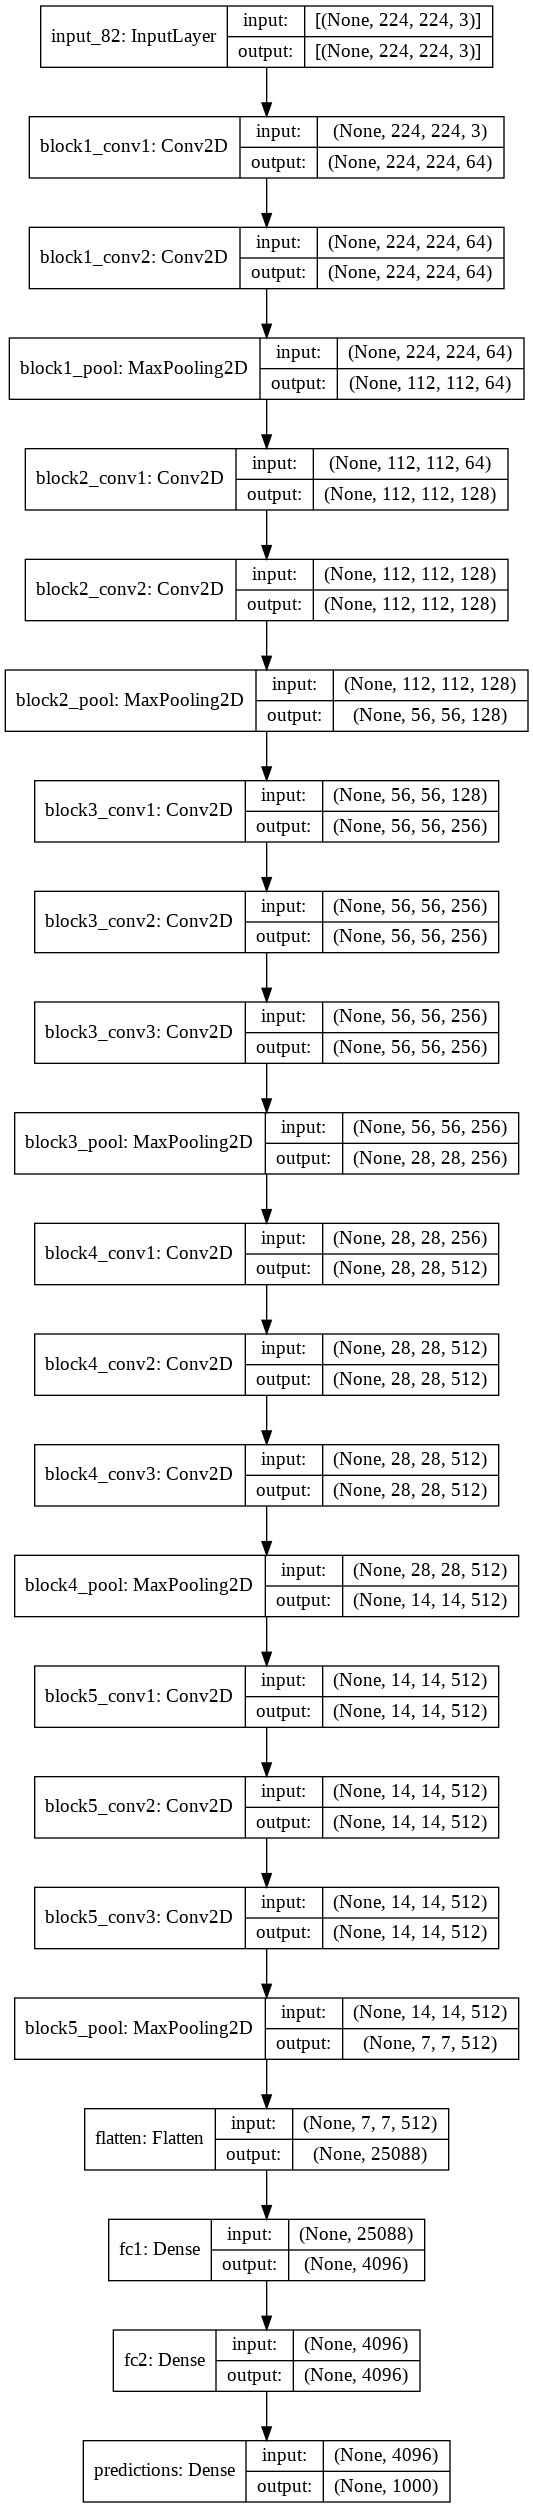

In [103]:
base_model = applications.vgg16.VGG16()
base_model.summary()
utils.plot_model(base_model, show_shapes=True)

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_83 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_504 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_505 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_191 (MaxPoolin (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_506 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_507 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_192 (MaxPoolin (None, 56, 56, 128)       0  

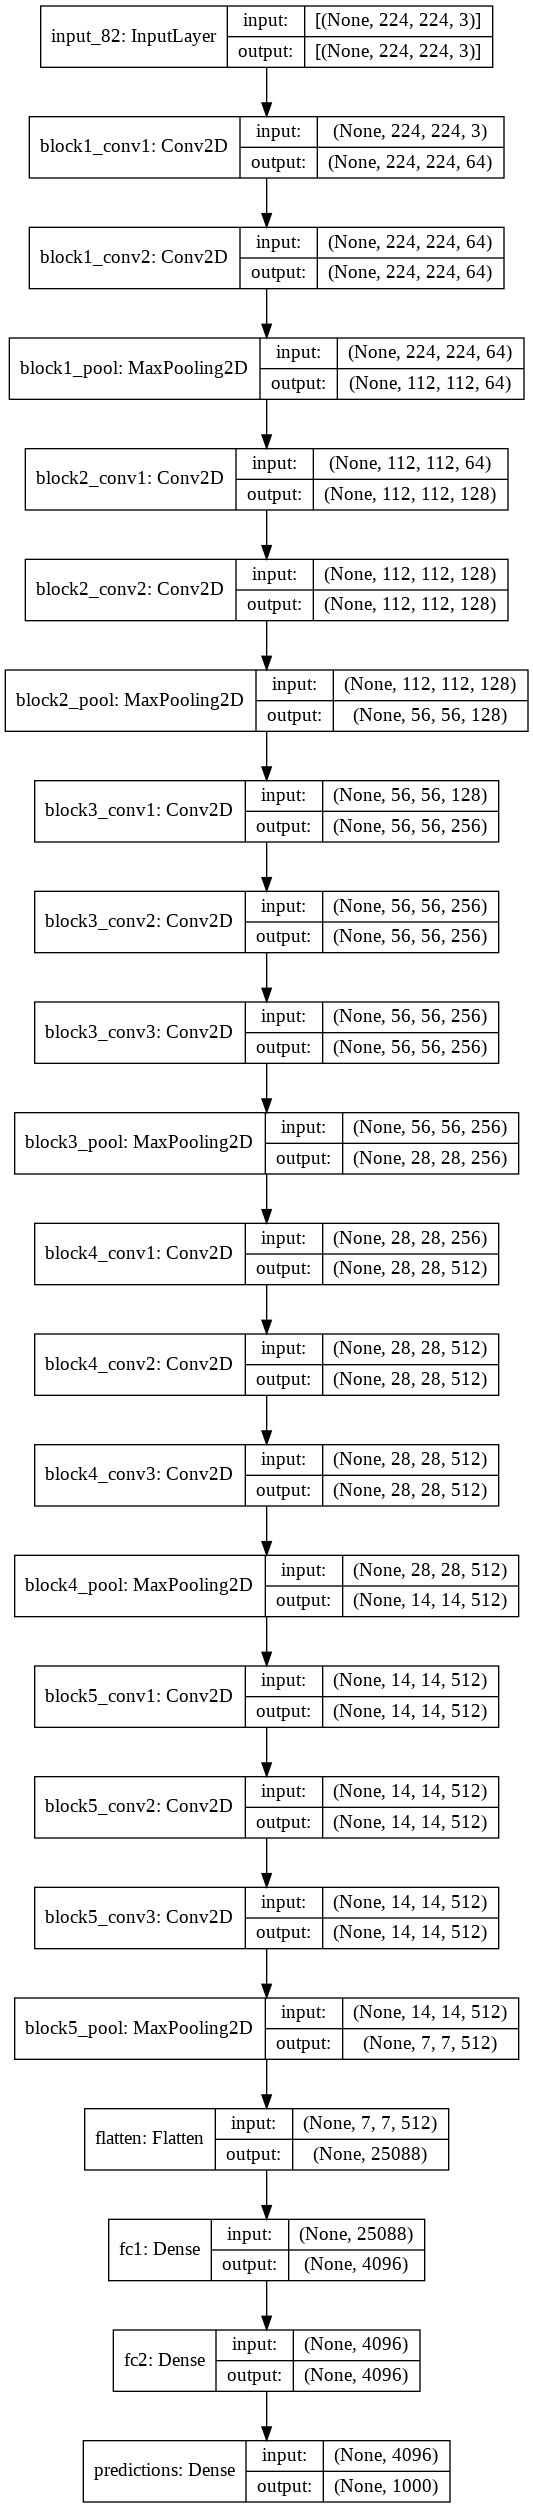

In [104]:
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import layers, models

model = models.Sequential()

def conv2d(x, filters=64):
  y = layers.Conv2D(filters, kernel_size=3, padding='same', activation='relu')(x)
  return y

def maxPooling2D(x, pool_size=(2,2), stride=(2,2)):
  y = layers.MaxPooling2D(pool_size=pool_size, strides=stride)(x)
  return y

def flatten(x):
  y = layers.Flatten()(x)
  return y

def dense(x, dense=4096):
  y = layers.Dense(dense)(x)
  return y

x = layers.Input(shape=(224, 224, 3))
y = conv2d(x)
y = conv2d(y)
y = maxPooling2D(y)
y = conv2d(y, filters=128)
y = conv2d(y, filters=128)
y = maxPooling2D(y)
y = conv2d(y, filters=256)
y = conv2d(y, filters=256)
y = conv2d(y, filters=256)
y = maxPooling2D(y)
y = conv2d(y, filters=512)
y = conv2d(y, filters=512)
y = conv2d(y, filters=512)
y = maxPooling2D(y)
y = conv2d(y, filters=512)
y = conv2d(y, filters=512)
y = conv2d(y, filters=512)
y = maxPooling2D(y)
y = flatten(y)
y = dense(y)
y = dense(y)
y = dense(y, dense=1000)

model = models.Model(x, y)
model.summary()
utils.plot_model(base_model, show_shapes=True)

## 2. MobileNET

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/10_dense.png?raw=true)

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_84 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

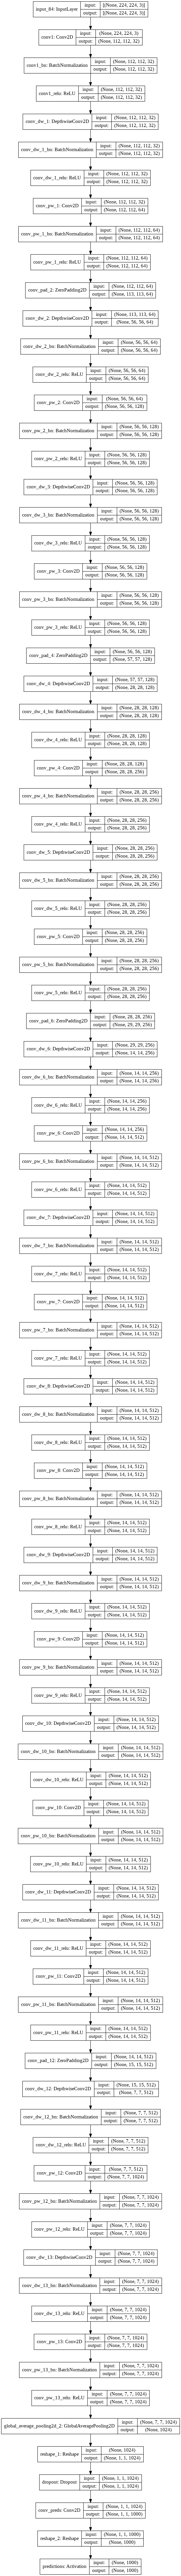

In [105]:
base_model = applications.mobilenet.MobileNet()
base_model.summary()
utils.plot_model(base_model, show_shapes=True)

## 3. ReseNET

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_85 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_85[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

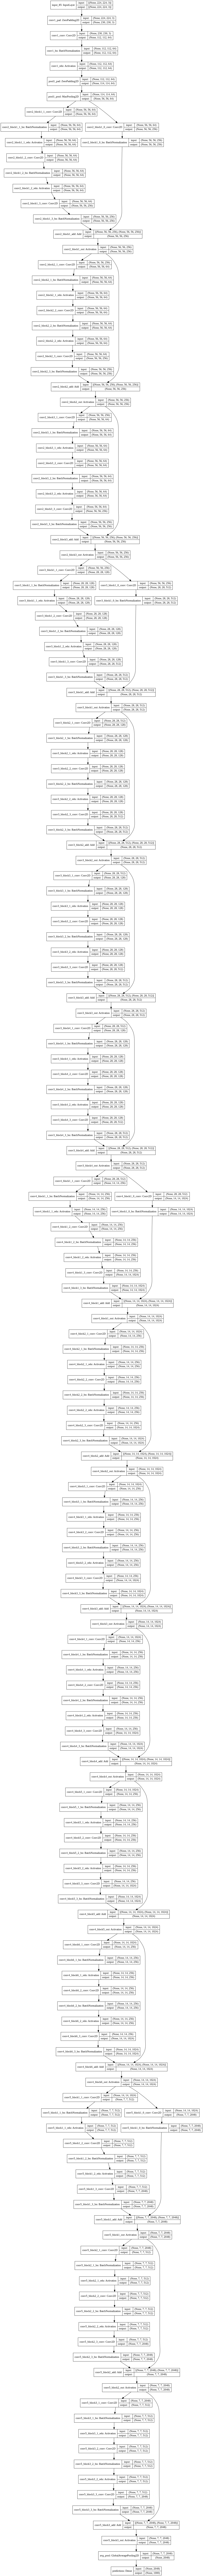

In [106]:
base_model = applications.resnet.ResNet50()
base_model.summary()
utils.plot_model(base_model, show_shapes=True)